In [1]:
%run ./'01 load.ipynb'

In [2]:
len_predictions = 10
start_date = '2020-02-20'
len_before_start = len(df[(df['country'] == 'Germany') & (df['date'] < start_date)])
len_after_start = len(df[(df['country'] == 'Germany') & (df['date'] >= start_date)])

In [3]:
germany = df[df['country'] == 'Germany']
dates_new = pd.date_range(germany['date'].iloc[-1], periods=len_predictions)
df_new = pd.DataFrame(dates_new[1:], columns=['date'])
germany = germany.append(df_new, ignore_index=True)
germany['date_string'] = germany['date'].dt.strftime('%d. %b')

In [4]:
# prepare machine learning magic
y = germany.iloc[len_before_start:]['confirmed'].dropna()
x = list(range(len(y)))
# machine learning magic
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return c**x + d
popt, pcov = curve_fit(func, x, y)

/miniconda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [5]:
# get x values from predictor
predict = []
for i in range(len_after_start+len_predictions):
    predict.append(func(i, *popt))

In [6]:
germany = germany.join(pd.DataFrame(enumerate(predict, len_before_start), columns=['id', 'predict']).set_index('id'))

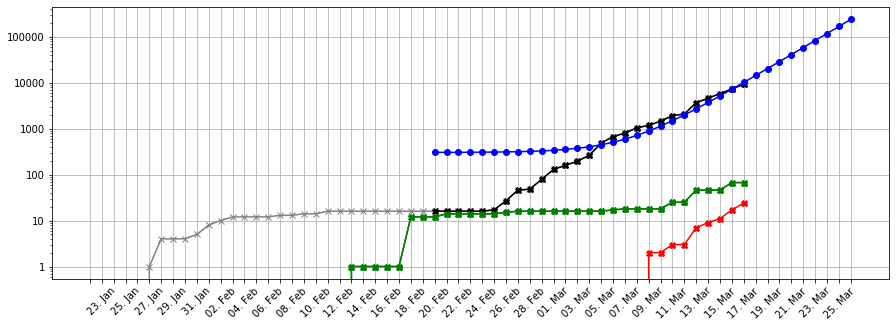

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
x = list(germany['date_string'])
%matplotlib inline
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(True)
ax1.plot(germany['date_string'], germany['confirmed'], marker='x', color='gray')
ax1.plot(germany['date_string'], germany['deaths'], marker='X', color='red')
ax1.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax1.plot(germany.iloc[len_before_start:]['date_string'], germany.iloc[len_before_start:]['confirmed'], marker='X', color='black')
ax1.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax1.plot(germany['date_string'], germany['predict'], marker='o', color='blue')
ax1.set_yscale('log')
ax1.set_xticklabels(labels=germany['date_string'], rotation=45)
ax1.yaxis.set_major_formatter(ScalarFormatter())
for label in ax1.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

In [8]:
germany.iloc[-len_predictions-5:]

,country,date_string,confirmed,deaths,recovered,date,predict
50,Germany,12. Mar,"2,078",3,25,2020-03-12,"1,983"
51,Germany,13. Mar,"3,675",7,46,2020-03-13,"2,696"
52,Germany,14. Mar,"4,585",9,46,2020-03-14,"3,711"
53,Germany,15. Mar,"5,795",11,46,2020-03-15,"5,157"
54,Germany,16. Mar,"7,272",17,67,2020-03-16,"7,217"
55,Germany,17. Mar,"9,257",24,67,2020-03-17,"10,150"
56,NaN,18. Mar,nan,nan,nan,2020-03-18,"14,327"
57,NaN,19. Mar,nan,nan,nan,2020-03-19,"20,277"
58,NaN,20. Mar,nan,nan,nan,2020-03-20,"28,751"
59,NaN,21. Mar,nan,nan,nan,2020-03-21,"40,821"
